# PyTorch Tensor Operations Overview

This code demonstrates various basic operations using PyTorch tensors. It covers:

- Creating tensors
- Arithmetic operations
- Matrix multiplication
- Element-wise operations
- Indexing and slicing
- Reshaping
- Concatenation
- Transposition
- Tensor properties
- Type casting
- GPU usage (if available)
- Reduction operations
- Broadcasting

Run this cell to see examples of each operation in action. This serves as a quick reference for common PyTorch tensor manipulations.


In [22]:
import torch

# Creating tensors
print("Creating tensors:")
a = torch.tensor([1, 2, 3])
b = torch.zeros(3)
c = torch.ones(3)
d = torch.rand(3)
e = torch.randn(3)
print(f"a: {a}")
print(f"b: {b}")
print(f"c: {c}")
print(f"d: {d}")
print(f"e: {e}")

# Basic arithmetic operations
print("\nBasic arithmetic operations:")
print(f"a + b: {a + b}")
print(f"a - c: {a - c}")
print(f"a * d: {a * d}")
print(f"a / c: {a / c}")

# Matrix multiplication
print("\nMatrix multiplication:")
m1 = torch.tensor([[1, 2], [3, 4]])
m2 = torch.tensor([[5, 6], [7, 8]])
print(f"m1 @ m2: {m1 @ m2}")

# Element-wise operations
print("\nElement-wise operations:")
print(f"torch.pow(a, 2): {torch.pow(a, 2)}")
print(f"torch.sqrt(a): {torch.sqrt(a.float())}")

# Indexing and slicing
print("\nIndexing and slicing:")
f = torch.tensor([1, 2, 3, 4, 5])
print(f"f[1]: {f[1]}")
print(f"f[1:4]: {f[1:4]}")

# Reshaping
print("\nReshaping:")
g = torch.tensor([1, 2, 3, 4, 5, 6])
print(f"g.view(2, 3): {g.view(2, 3)}")
print(f"g.view(-1, 2): {g.view(-1, 2)}")

# Concatenation
print("\nConcatenation:")
h = torch.tensor([7, 8, 9])
print(f"torch.cat((a, h)): {torch.cat((a, h))}")

# Transposition
print("\nTransposition:")
i = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(f"i.t(): {i.t()}")

# Getting properties
print("\nTensor properties:")
print(f"a.shape: {a.shape}")
print(f"a.dtype: {a.dtype}")
print(f"a.device: {a.device}")

# Type casting
print("\nType casting:")
j = torch.tensor([1, 2, 3], dtype=torch.float32)
print(f"j.long(): {j.long()}")

# Moving tensors to GPU (if available)
print("\nMoving tensor to GPU:")
if torch.cuda.is_available():
    k = torch.tensor([1, 2, 3]).cuda()
    print(f"k.device: {k.device}")
else:
    print("CUDA is not available.")

# Common reduction operations
print("\nReduction operations:")
l = torch.tensor([1, 2, 3, 4, 5], dtype=torch.float32)
print(f"l.sum(): {l.sum()}")
print(f"l.mean(): {l.mean()}")
print(f"l.max(): {l.max()}")
print(f"l.min(): {l.min()}")

# Broadcasting
print("\nBroadcasting:")
m = torch.tensor([1, 2, 3])
n = torch.tensor([[1], [2], [3]])
print(f"m + n:\n{m + n}")

Creating tensors:
a: tensor([1, 2, 3])
b: tensor([0., 0., 0.])
c: tensor([1., 1., 1.])
d: tensor([0.7619, 0.6265, 0.4951])
e: tensor([ 0.7468, -0.2019,  1.5077])

Basic arithmetic operations:
a + b: tensor([1., 2., 3.])
a - c: tensor([0., 1., 2.])
a * d: tensor([0.7619, 1.2531, 1.4853])
a / c: tensor([1., 2., 3.])

Matrix multiplication:
m1 @ m2: tensor([[19, 22],
        [43, 50]])

Element-wise operations:
torch.pow(a, 2): tensor([1, 4, 9])
torch.sqrt(a): tensor([1.0000, 1.4142, 1.7321])

Indexing and slicing:
f[1]: 2
f[1:4]: tensor([2, 3, 4])

Reshaping:
g.view(2, 3): tensor([[1, 2, 3],
        [4, 5, 6]])
g.view(-1, 2): tensor([[1, 2],
        [3, 4],
        [5, 6]])

Concatenation:
torch.cat((a, h)): tensor([1, 2, 3, 7, 8, 9])

Transposition:
i.t(): tensor([[1, 4],
        [2, 5],
        [3, 6]])

Tensor properties:
a.shape: torch.Size([3])
a.dtype: torch.int64
a.device: cpu

Type casting:
j.long(): tensor([1, 2, 3])

Moving tensor to GPU:
k.device: cuda:0

Reduction operations:

# Simple Linear Model with PyTorch

This code demonstrates how to create, train, and use a basic linear model using PyTorch. Here's what the script does:

1. **Data Generation**: Creates synthetic data for a simple linear relationship (y = 2x + 1) with some added noise.

2. **Model Definition**: Defines a `LinearModel` class that inherits from `nn.Module`, representing a simple linear regression model.

3. **Model Setup**: Initializes the model, loss function (Mean Squared Error), and optimizer (Stochastic Gradient Descent).

4. **Training Loop**: Trains the model for 500 epochs, updating the model parameters to minimize the loss.

5. **Results**: Prints the learned parameters (slope and intercept) and makes predictions on a small test set.

This example serves as a basic introduction to building and training neural networks with PyTorch, showcasing the fundamental steps involved in a machine learning workflow.

Run this cell to see the training process and results of a simple linear regression model.

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Set random seed for reproducibility
torch.manual_seed(42)

# Generate dummy data
X = torch.randn(300, 1)
Y = 2 * X + 1 + torch.randn(300, 1) * 0.1

# Define the model
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(1, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.relu(self.linear(x))
        # return self.linear(x)

# Initialize the model, loss function, and optimizer
model = LinearModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 500
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, Y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print progress
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Print the model's learned parameters
m = model.linear.weight.item()
c = model.linear.bias.item()
print(f"Learned parameters: m = {m:.4f}, c = {c:.4f}")

# Make predictions
with torch.no_grad():
    X_test = torch.tensor([[0.0], [1.0], [2.0], [3.0]])
    Y_pred = model(X_test)
    print("Predictions:")
    for x_, y_ in zip(X_test, Y_pred):
        print(f"Input: {x_.item():.1f}, Prediction: {y_.item():.4f}")

Epoch [100/500], Loss: 0.9704
Epoch [200/500], Loss: 0.8889
Epoch [300/500], Loss: 0.8740
Epoch [400/500], Loss: 0.8697
Epoch [500/500], Loss: 0.8683
Learned parameters: m = 1.9568, c = 1.0529
Predictions:
Input: 0.0, Prediction: 1.0529
Input: 1.0, Prediction: 3.0097
Input: 2.0, Prediction: 4.9665
Input: 3.0, Prediction: 6.9233


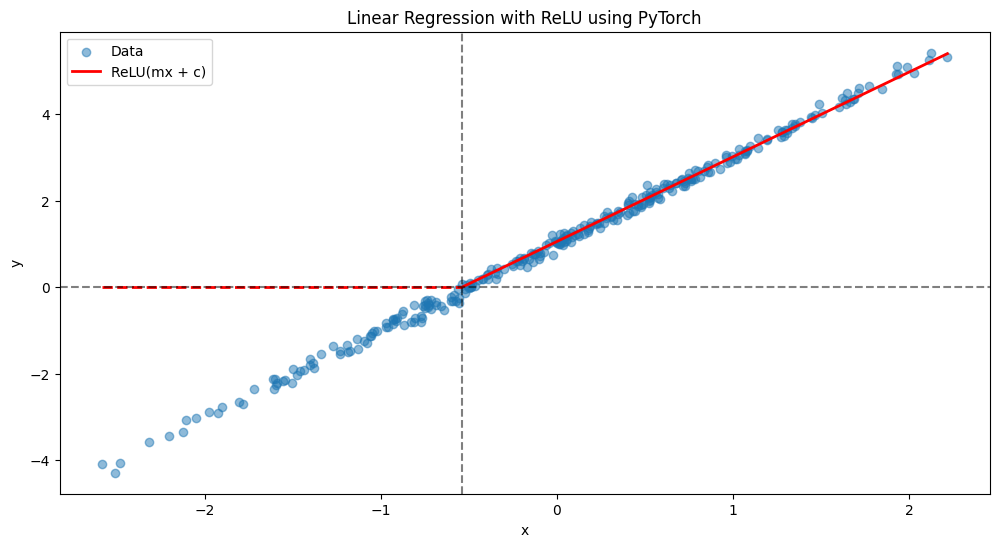

In [35]:
plt.figure(figsize=(12, 6))
plt.scatter(X.numpy(), Y.numpy(), label='Data', alpha=0.5)

# Generate points for the line
x_line = np.linspace(X.min(), X.max(), 1000)
y_line = m * x_line + c

# Find the point where the line crosses y=0
x_zero = -c / m if m != 0 else 0

# Plot the active part of ReLU
# mask = y_line >= np.min(y_line)
mask = y_line > 0
plt.plot(x_line[mask], y_line[mask], color='r', label='ReLU(mx + c)', linewidth=2)

# Plot the inactive part of ReLU
plt.plot(x_line[~mask], np.zeros_like(x_line[~mask]), color='r', linestyle='--', linewidth=2)

plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
plt.axvline(x=x_zero, color='k', linestyle='--', alpha=0.5)

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression with ReLU using PyTorch')
plt.show()